In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *

## Weather Forecast

In [3]:
weather = getDF(WEATHER_TABLE)
weather['forecast_timestamp'] = pd.to_datetime(weather['forecastdate'], format="%d-%m-%Y %H:%M")
K_TO_C = -273.15 

print("Weather from ", weather['forecast_timestamp'].min(), " To ", weather['forecast_timestamp'].max())
print(weather)


Weather from  2024-11-22 10:30:03  To  2024-11-24 03:57:31
        location        forecastdate description  feels_like  humidity  \
0    Ho Chi Minh 2024-11-22 10:30:03  light rain  310.250000      67.0   
1    Ho Chi Minh 2024-11-22 10:30:24  light rain  310.250000      67.0   
2    Ho Chi Minh 2024-11-22 10:30:44  light rain  310.250000      67.0   
3    Ho Chi Minh 2024-11-22 10:31:05  light rain  310.250000      67.0   
4    Ho Chi Minh 2024-11-22 10:31:25  light rain  310.250000      67.0   
..           ...                 ...         ...         ...       ...   
509    Melbourne 2024-11-24 03:56:07   clear sky  282.880005      80.0   
510    Melbourne 2024-11-24 03:56:28   clear sky  282.880005      80.0   
511    Melbourne 2024-11-24 03:56:49   clear sky  282.880005      80.0   
512    Melbourne 2024-11-24 03:57:09   clear sky  282.880005      80.0   
513    Melbourne 2024-11-24 03:57:31   clear sky  282.880005      80.0   

     pressure     sunrise      sunset        temp   

Text(0.5, 1.0, 'Recorded temperature in Ho Chi Minh (Kelvin)')

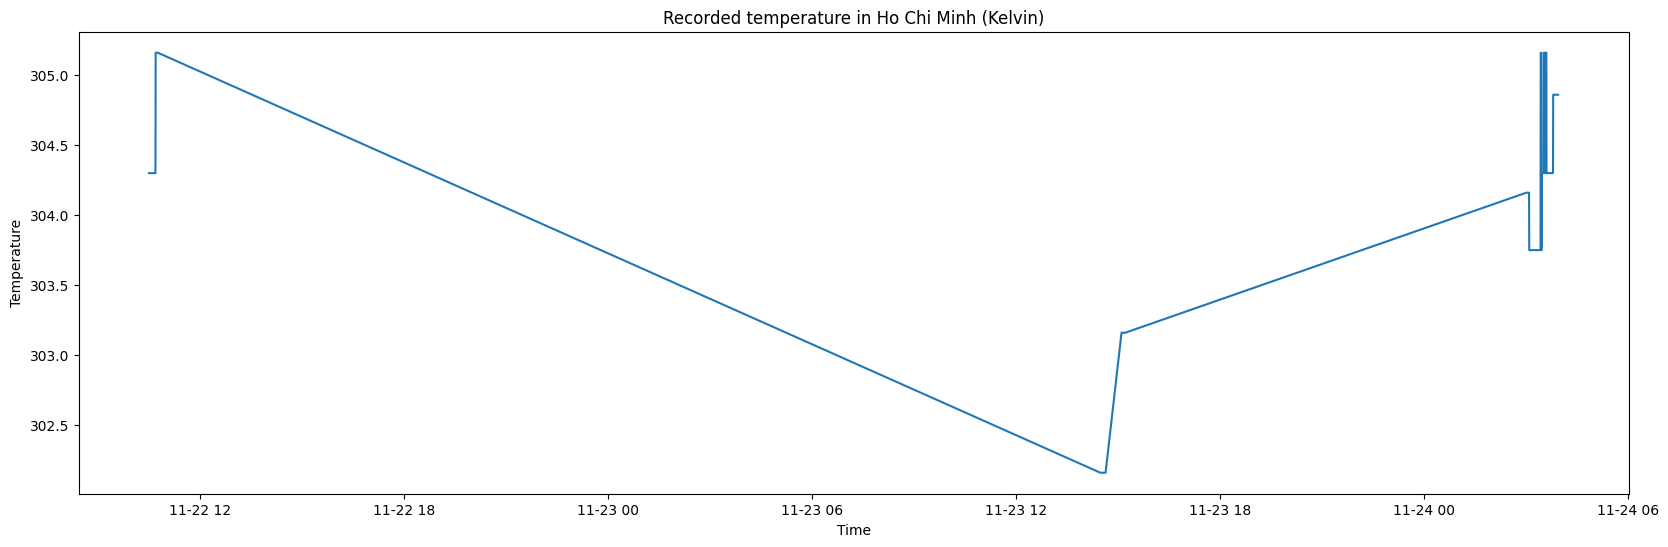

In [4]:
location_1 = 'Ho Chi Minh'
df_1 = weather[weather['location'] == location_1]

plt.figure(figsize=(20,6))
plt.plot(df_1['forecast_timestamp'], df_1['temp'])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title(f'Recorded temperature in {location_1} (Kelvin)')

/tmp/ipykernel_12/2425590891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2[col] = df_2[col].map(lambda x : x + K_TO_C)


Text(0.5, 1.0, 'Recorded temperature in Melbourne (Celcisus)')

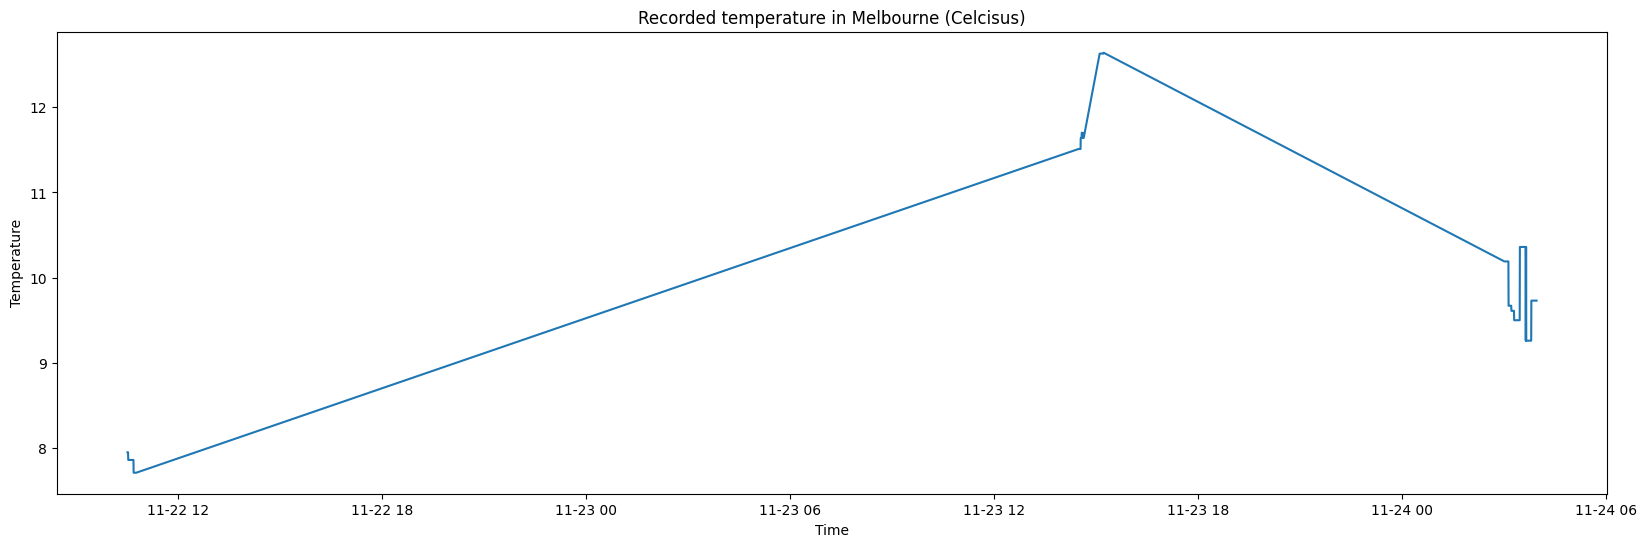

In [5]:
location_2 = 'Melbourne'
col = 'feels_like'

df_2 = weather[weather['location'] == location_2]
df_2[col] = df_2[col].map(lambda x : x + K_TO_C)

plt.figure(figsize=(20,6))
plt.plot(df_2['forecast_timestamp'], df_2[col])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title(f'Recorded temperature in {location_2} (Celcisus)')

## FAKER API VISUALIZATION

## CRYPTOCURRENCY VISUALIZATION

In [7]:
customDF = getDF(CUSTOM_TABLE)

print(customDF)

                   time           ask           bid          last     symbols
0   2024-11-24 03:46:02  98309.328125  98309.320312  98281.296875  [BTC, USD]
1   2024-11-24 03:47:20  98329.679688  98329.671875  98329.609375  [BTC, USD]
2   2024-11-24 03:28:19  98418.343750  98414.281250  98419.898438  [BTC, USD]
3   2024-11-24 03:34:23  98365.867188  98359.132812  98365.867188  [BTC, USD]
4   2024-11-24 03:41:08  98300.007812  98300.000000  98300.007812  [BTC, USD]
..                  ...           ...           ...           ...         ...
124 2024-11-24 03:45:28  98281.296875  98281.289062  98280.140625  [BTC, USD]
125 2024-11-24 03:31:31  98331.953125  98327.968750  98331.953125  [BTC, USD]
126 2024-11-24 03:43:58  98294.367188  98294.359375  98261.968750  [BTC, USD]
127 2024-11-24 03:36:16  98374.421875  98370.882812  98374.468750  [BTC, USD]
128 2024-11-24 03:50:49  98295.257812  98293.898438  98305.031250  [BTC, USD]

[129 rows x 5 columns]


Text(0.5, 1.0, 'BTC to USD')

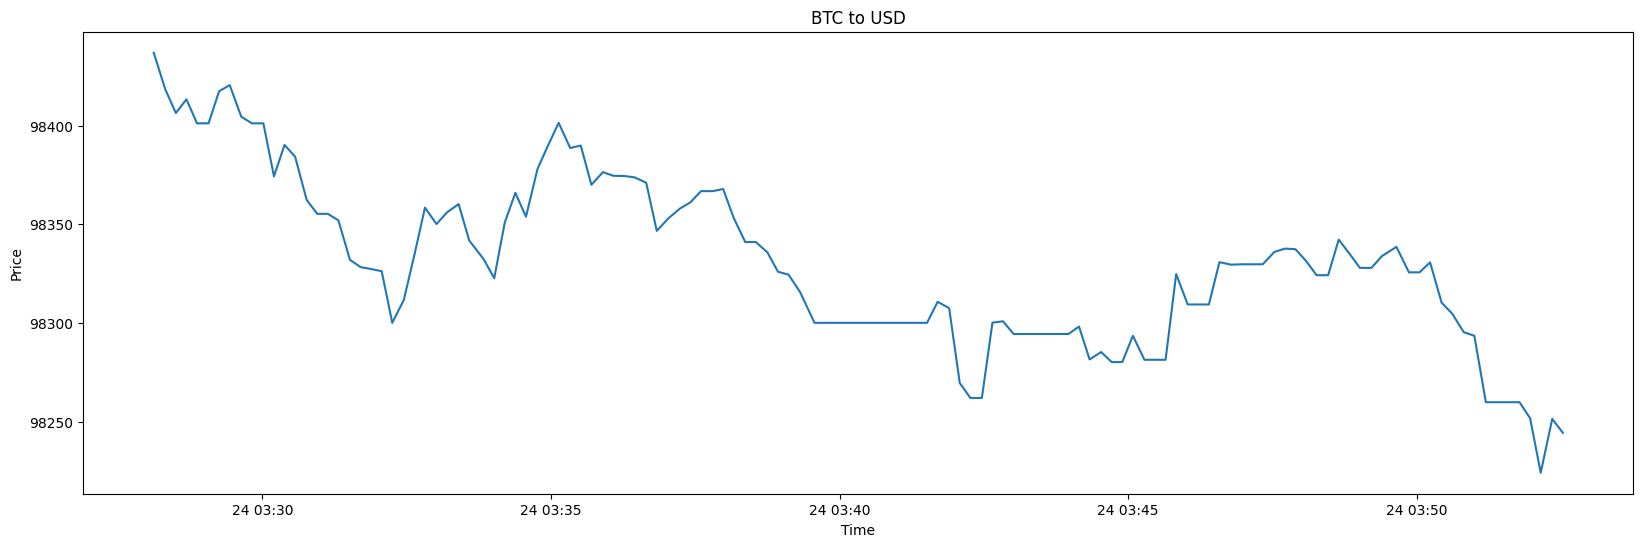

In [9]:
customDF = customDF.sort_values('time')

plt.figure(figsize=(20,6))
plt.plot(customDF['time'], customDF['ask'])
plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f'BTC to USD')